In [ ]:
%matplotlib inline


# Contour plot of irregularly spaced data


Comparison of a contour plot of irregularly spaced data interpolated
on a regular grid versus a tricontour plot for an unstructured triangular grid.

Since `~.axes.Axes.contour` and `~.axes.Axes.contourf` expect the data to live
on a regular grid, plotting a contour plot of irregularly spaced data requires
different methods. The two options are:

* Interpolate the data to a regular grid first. This can be done with on-board
  means, e.g. via `~.tri.LinearTriInterpolator` or using external functionality
  e.g. via `scipy.interpolate.griddata`. Then plot the interpolated data with
  the usual `~.axes.Axes.contour`.
* Directly use `~.axes.Axes.tricontour` or `~.axes.Axes.tricontourf` which will
  perform a triangulation internally.

This example shows both methods in action.



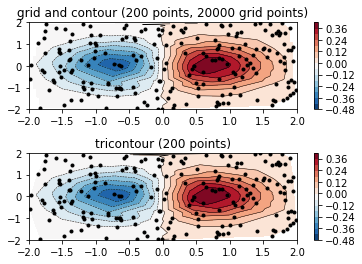

In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

np.random.seed(19680801)
npts = 200
ngridx = 100
ngridy = 200
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
z = x * np.exp(-x**2 - y**2)

fig, (ax1, ax2) = plt.subplots(nrows=2)

# -----------------------
# Interpolation on a grid
# -----------------------
# A contour plot of irregularly spaced data coordinates
# via interpolation on a grid.

# Create grid values first.
xi = np.linspace(-2.1, 2.1, ngridx)
yi = np.linspace(-2.1, 2.1, ngridy)

# Perform linear interpolation of the data (x,y)
# on a grid defined by (xi,yi)
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

# Note that scipy.interpolate provides means to interpolate data on a grid
# as well. The following would be an alternative to the four lines above:
#from scipy.interpolate import griddata
#zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear')


ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko', ms=3)
ax1.set(xlim=(-2, 2), ylim=(-2, 2))
ax1.set_title('grid and contour (%d points, %d grid points)' %
              (npts, ngridx * ngridy))


# ----------
# Tricontour
# ----------
# Directly supply the unordered, irregularly spaced coordinates
# to tricontour.

ax2.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(x, y, z, levels=14, cmap="RdBu_r")

fig.colorbar(cntr2, ax=ax2)
ax2.plot(x, y, 'ko', ms=3)
ax2.set(xlim=(-2, 2), ylim=(-2, 2))
ax2.set_title('tricontour (%d points)' % npts)

plt.subplots_adjust(hspace=0.5)
plt.show()

------------

References
""""""""""

The use of the following functions and methods is shown in this example:



In [ ]:
import matplotlib
matplotlib.axes.Axes.contour
matplotlib.pyplot.contour
matplotlib.axes.Axes.contourf
matplotlib.pyplot.contourf
matplotlib.axes.Axes.tricontour
matplotlib.pyplot.tricontour
matplotlib.axes.Axes.tricontourf
matplotlib.pyplot.tricontourf